using data https://physionet.org/content/sleep-accel/1.0.0/heart_rate/

In [2]:
%pip install numpy pandas matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta, datetime


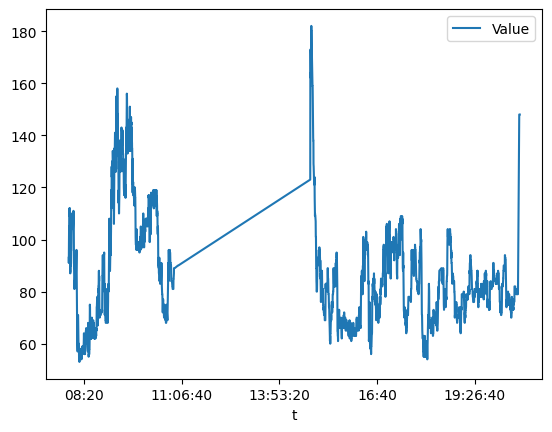

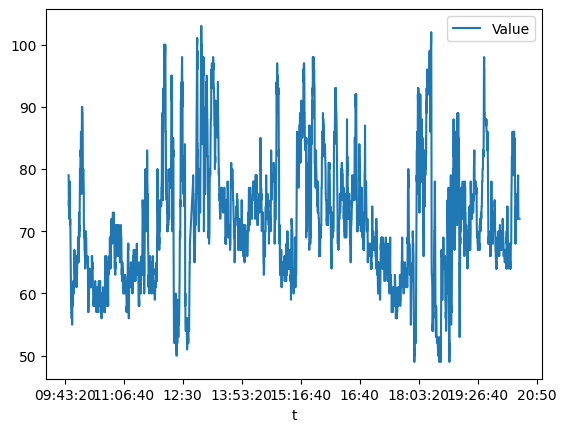

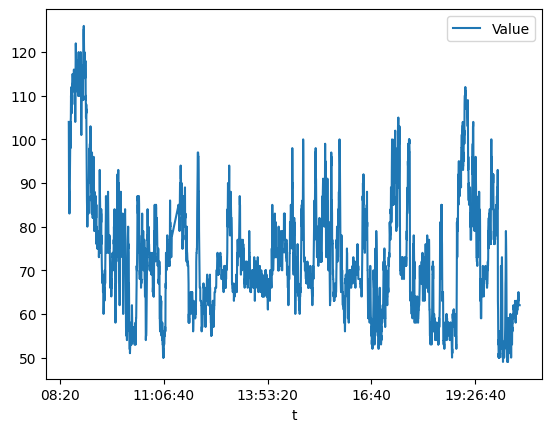

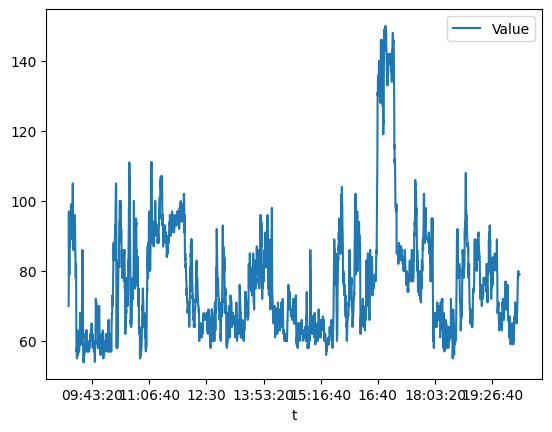

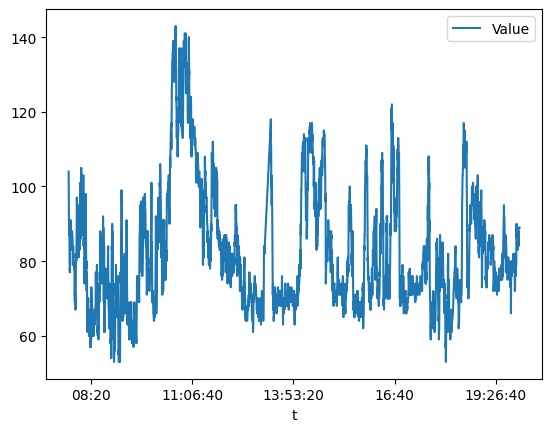

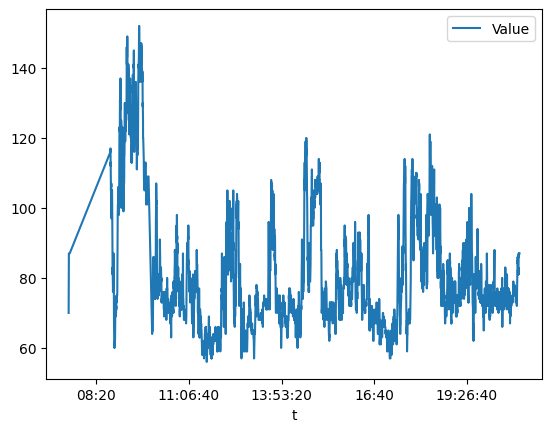

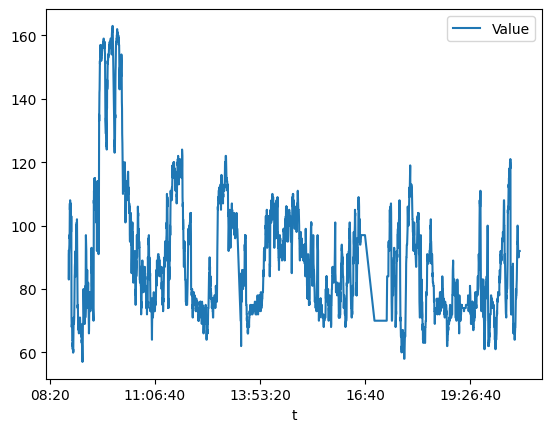

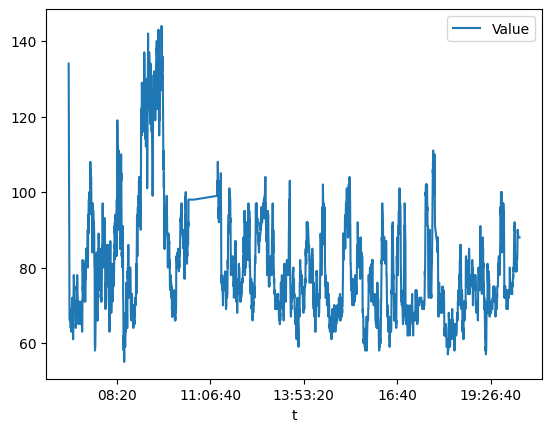

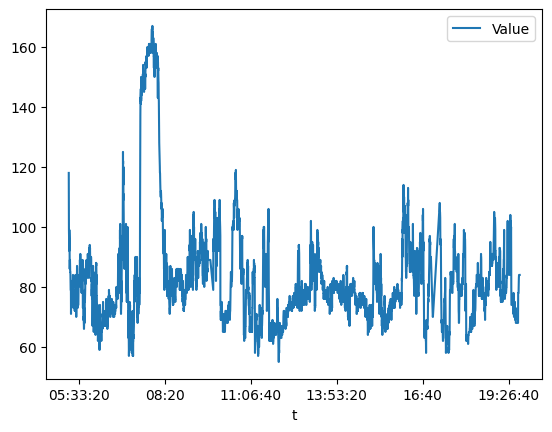

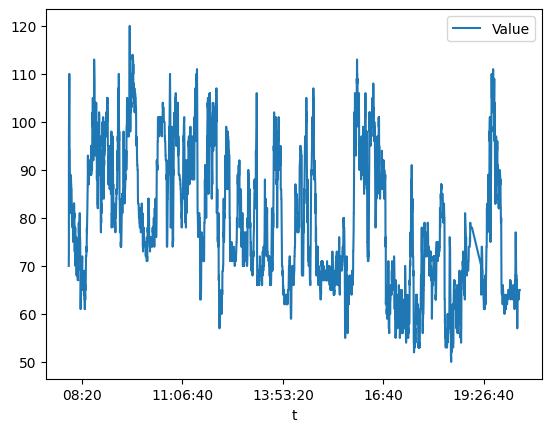

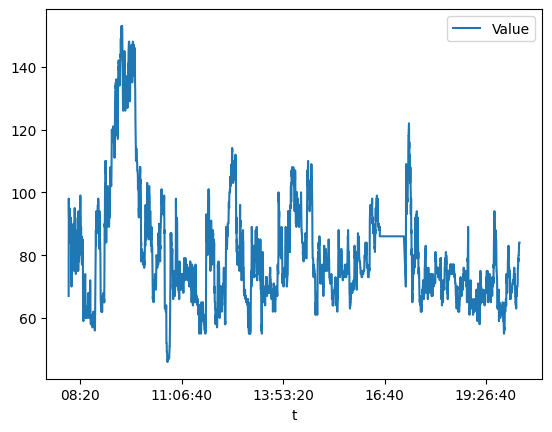

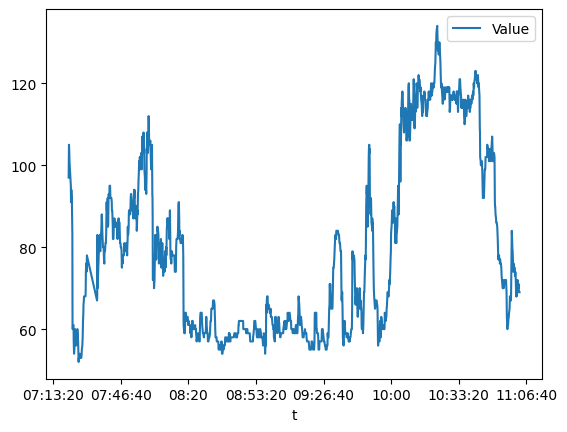

In [ ]:
df = pd.read_csv('./data/heartrate_seconds_merged.csv')

df['pyTime'] = pd.to_datetime(df['Time'], format="%m/%d/%Y %I:%M:%S %p")

day_df = df[df['Id'] == 2022484408]

for hour in range(1,13):
    d = day_df[day_df['pyTime'].dt.day == hour].copy()
    d['t'] = d['pyTime'].dt.time
    d.plot.line(x='t', y='Value')


4
5
6
0
1
2
3
4
5
6
0
5


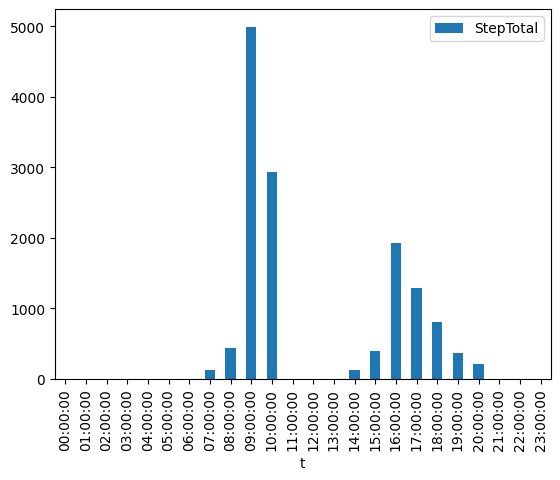

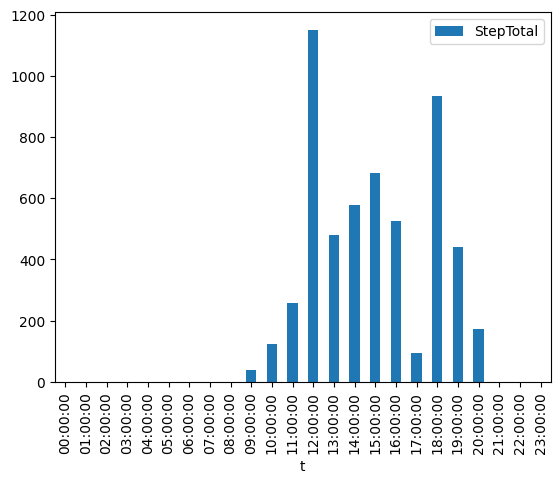

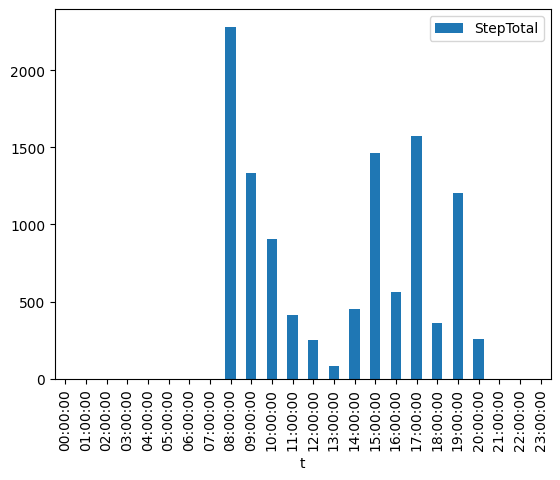

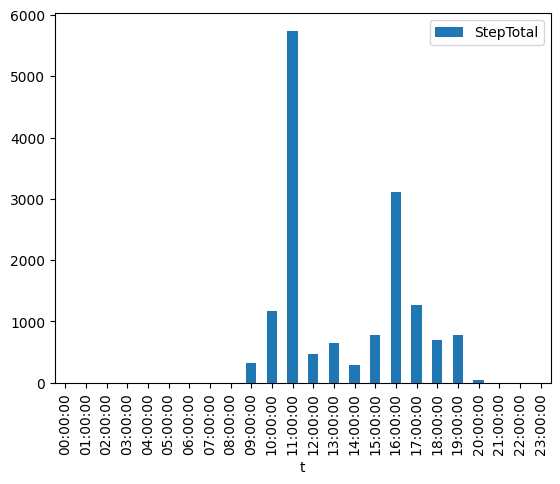

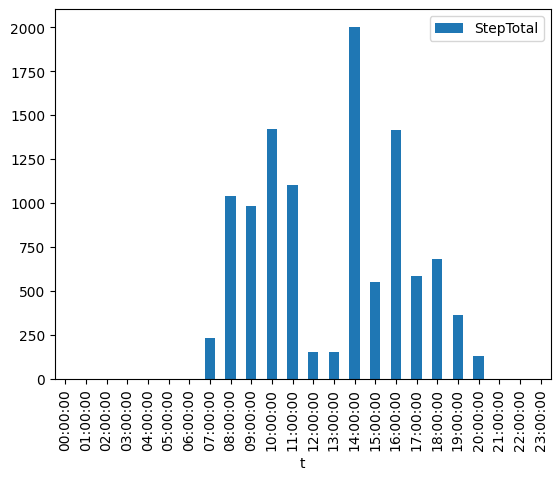

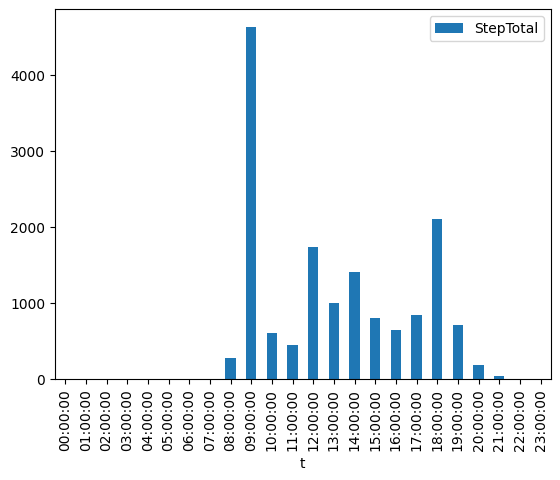

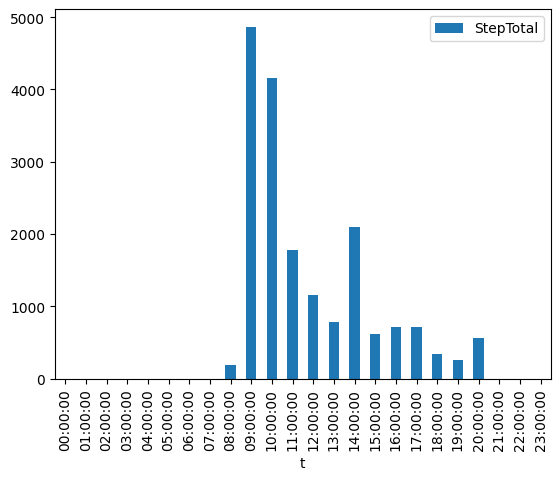

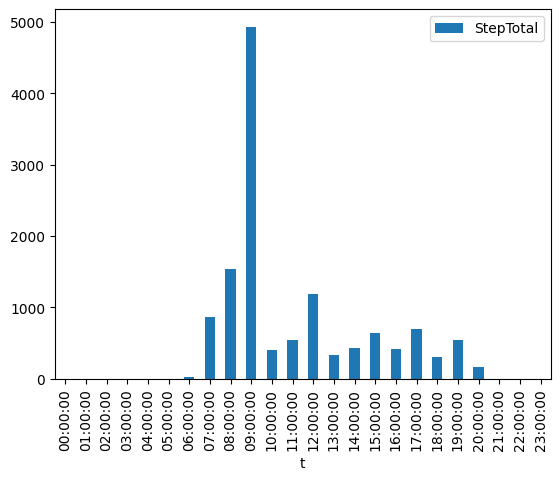

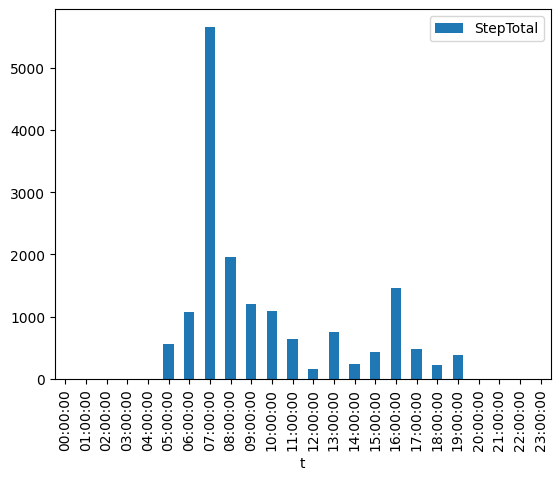

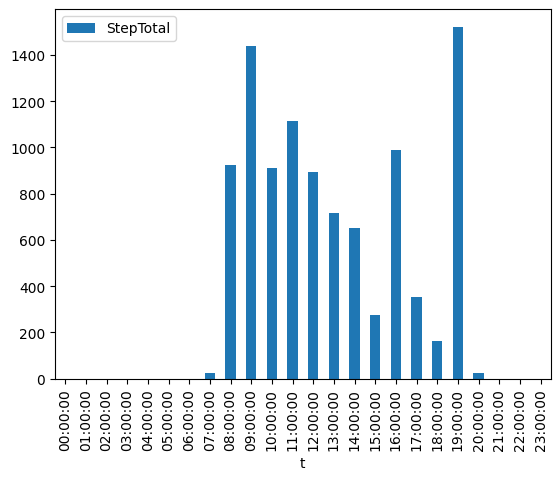

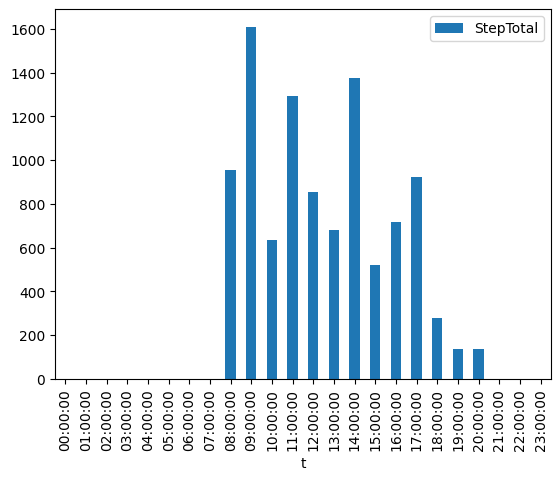

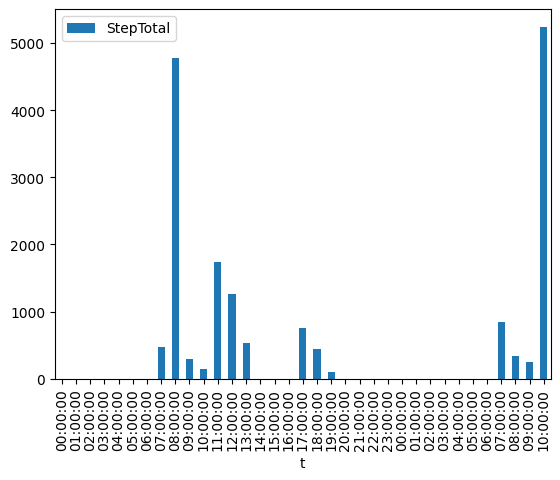

In [71]:
df = pd.read_csv('./data/hourlySteps_merged.csv')

df['pyTime'] = pd.to_datetime(df['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p")

day_df = df[df['Id'] == 2022484408]

for day in range(1,13):
    d = day_df[day_df['pyTime'].dt.day == day].copy()
    print(d.iat[0,3].weekday())

    d['t'] = d['pyTime'].dt.time
    d.plot.bar(x='t', y='StepTotal')


                 pyTime          Id                   date  value        logId
0   2016-03-11 21:00:00  2026352035   3/11/2016 9:31:30 PM     37  11103729104
1   2016-03-11 22:00:00  2026352035  3/11/2016 10:00:30 PM     69  11103729104
2   2016-03-11 23:00:00  2026352035  3/11/2016 11:00:30 PM     68  11103729104
3   2016-03-12 00:00:00  2026352035  3/12/2016 12:00:30 AM     63  11103729104
4   2016-03-12 01:00:00  2026352035   3/12/2016 1:00:30 AM     61  11103729104
..                  ...         ...                    ...    ...          ...
748 2016-04-12 01:00:00  2026352035   4/12/2016 1:00:00 AM     60  11372566564
749 2016-04-12 02:00:00  2026352035   4/12/2016 2:00:00 AM     61  11372566564
750 2016-04-12 03:00:00  2026352035   4/12/2016 3:00:00 AM     60  11372566564
751 2016-04-12 04:00:00  2026352035   4/12/2016 4:00:00 AM     66  11372566564
752 2016-04-12 05:00:00  2026352035   4/12/2016 5:00:00 AM     57  11372566564

[753 rows x 5 columns]


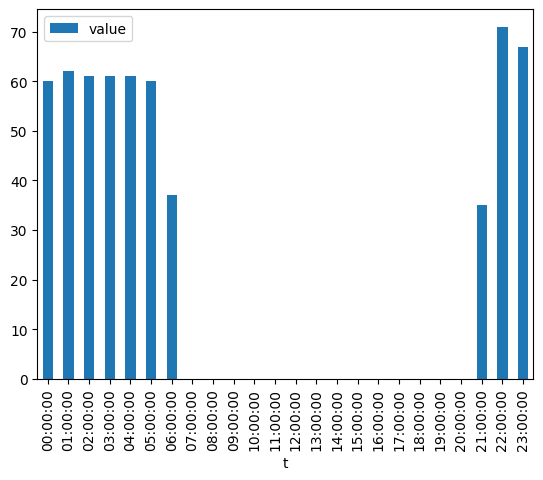

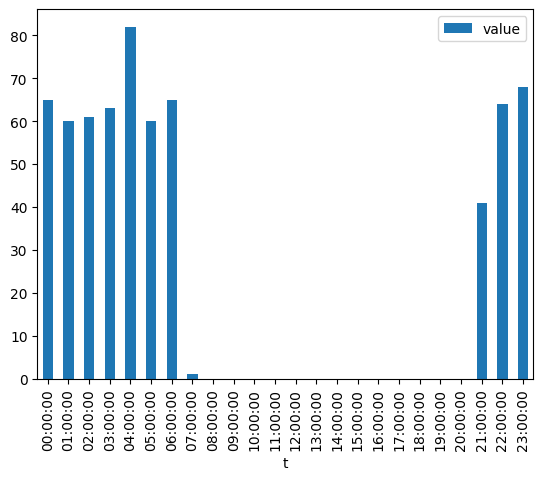

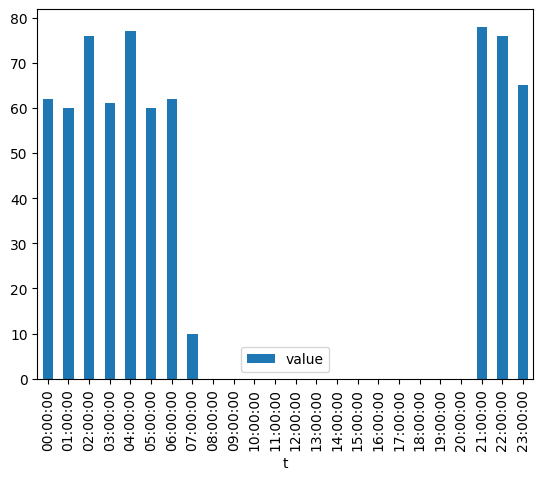

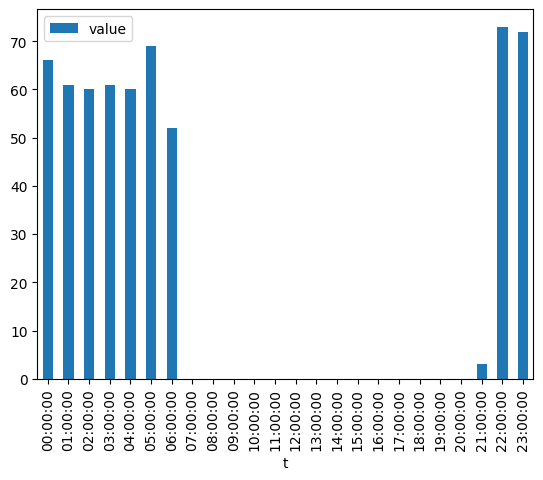

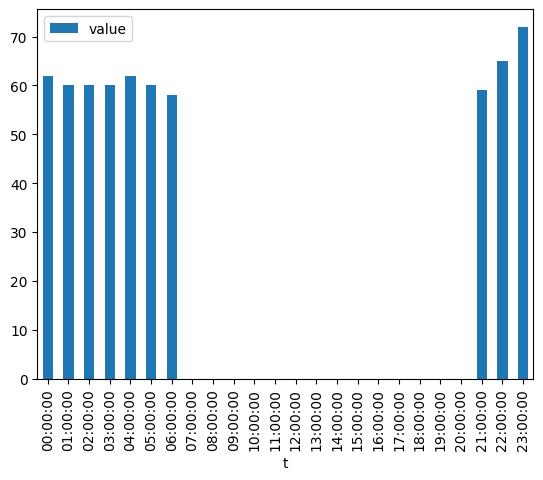

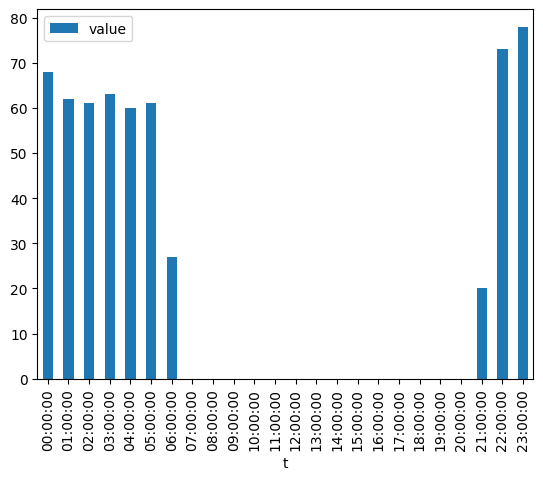

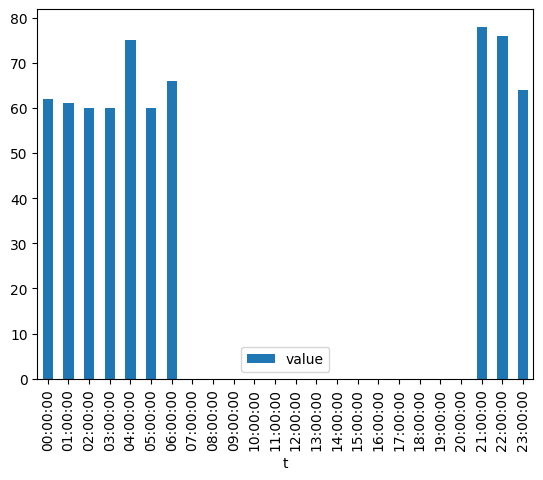

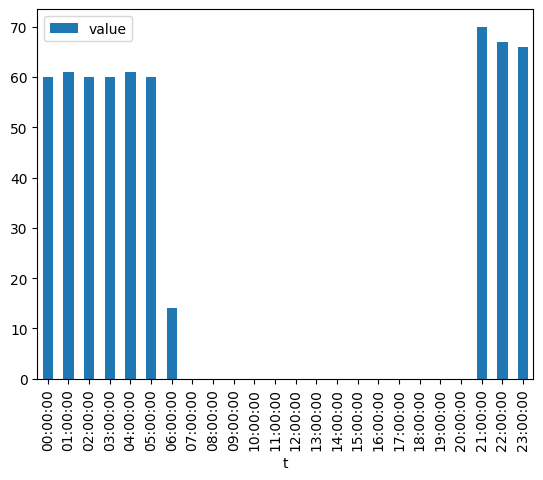

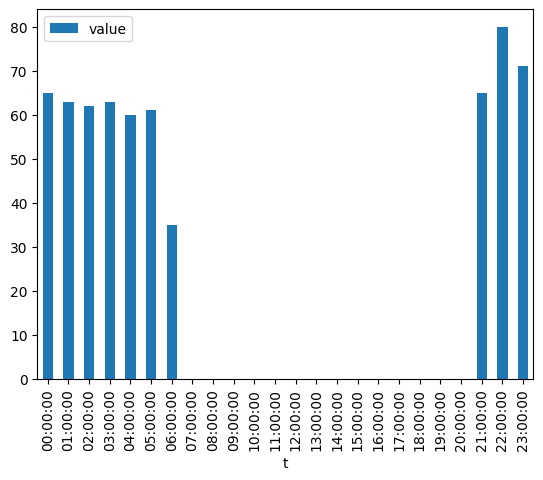

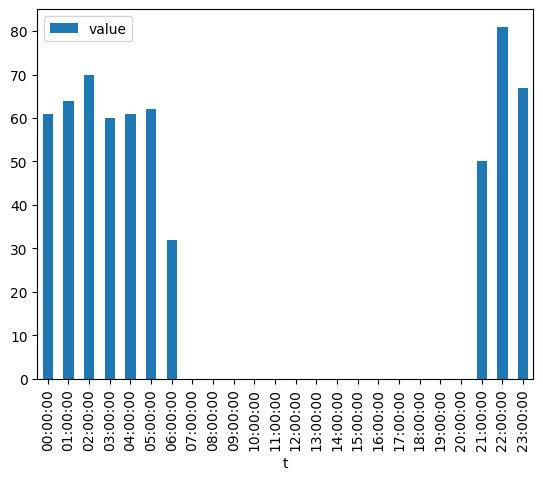

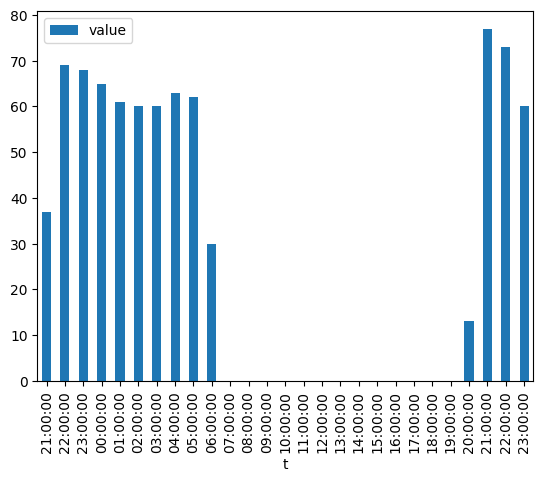

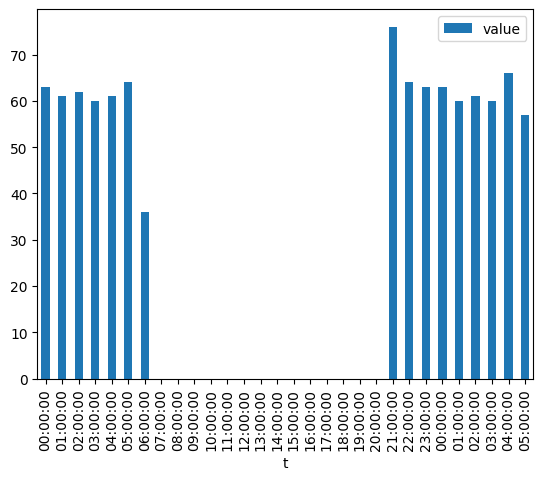

In [93]:
df = pd.read_csv('./data/minuteSleep_merged.csv')

df['pyTime'] = pd.to_datetime(df['date'], format="%m/%d/%Y %I:%M:%S %p")

day_df = df[df['Id'] == 2026352035]

day_df = day_df.groupby(pd.Grouper(key='pyTime', freq='h')).agg({
    'Id': 'first',  
    'date': 'first',  
    'value': 'sum',       
    'logId': 'first',  
}).reset_index()

day_df['Id'] = day_df['Id'].fillna(0).astype(int)
day_df['logId'] = day_df['logId'].fillna(0).astype(int)

print(day_df)

for day in range(1,13):
    d = day_df[day_df['pyTime'].dt.day == day].copy()

    d['t'] = d['pyTime'].dt.time
    d.plot.bar(x='t', y='value')

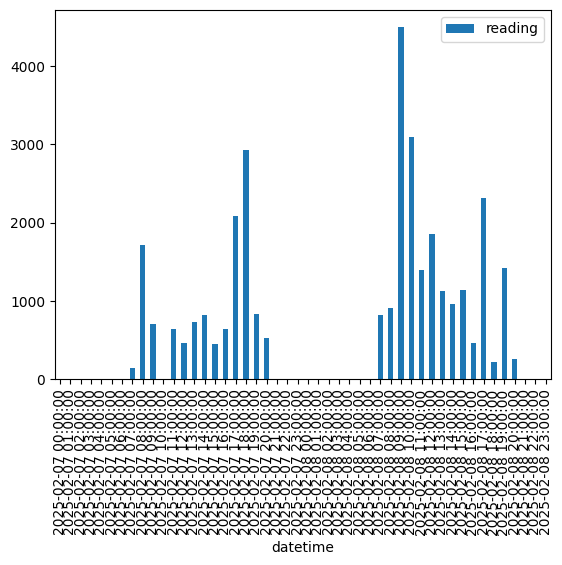

In [ ]:
df = pd.read_csv('./data/hourlySteps_merged.csv')

df['pyTime'] = pd.to_datetime(df['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p")

user_df = df[df['Id'] == 2022484408]
num_days = 2

starting_date = pd.to_datetime('2025-02-07')
date_range = pd.date_range(start=starting_date, periods=24*num_days, freq='h')

df_synthetic = pd.DataFrame(date_range, columns=['datetime'])
df_synthetic['reading'] = 0

synth_by_hour = {i: [] for i in range(24)}

for hour in range(0, 24):
    df_hour = user_df[ user_df['pyTime'].dt.hour == hour ]
    
    synthetic_data = np.random.normal(df_hour['StepTotal'].mean(), df_hour['StepTotal'].std(), num_days)
    synthetic_data = np.nan_to_num(synthetic_data)
    synthetic_data = np.clip(synthetic_data, a_min=0, a_max=None)
    synthetic_data = synthetic_data.astype(int)

    synth_by_hour[hour] = synthetic_data

for date in date_range:
    no_day = (date-starting_date).days
    df_synthetic.loc[df_synthetic['datetime'] == date, 'reading'] = synth_by_hour[date.hour][no_day]

#print(df_synthetic)
ax = df_synthetic.plot.bar(x='datetime', y='reading')

#print(df['Id'].unique())

In [68]:
df = pd.read_csv('./data/heartrate_seconds_merged.csv')

df['pyTime'] = pd.to_datetime(df['Time'], format="%m/%d/%Y %I:%M:%S %p")

print(df['Id'].unique())

[2022484408 2026352035 2347167796 4020332650 4558609924 5553957443
 5577150313 6117666160 6391747486 6775888955 6962181067 7007744171
 8792009665 8877689391]
